In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
df = pd.read_csv('Data/mushroom_cleaned.csv')

In [4]:
df.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.shape

(54035, 9)

# Logistic Regression

In [6]:
LR = LogisticRegression(max_iter=200)

In [7]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6347019443873237

In [8]:
# Xử lý outlier

from scipy import stats

# Hàm để loại bỏ outlier bằng Z-score
def remove_outliers_zscore(df, column, threshold=2):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < threshold)]

# Loại bỏ outlier trong các cột 'stem-width', 'stem-height'
df = remove_outliers_zscore(df, 'cap-diameter')
df = remove_outliers_zscore(df, 'stem-width')
df = remove_outliers_zscore(df, 'stem-height')

print(df.shape)  # Kiểm tra kích thước dữ liệu sau khi loại bỏ outlier


(46211, 9)


In [9]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6350520972481967

In [10]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

0.647929468340903

In [12]:
# Dùng Regularization và cross validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag']
}
LR_regu = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy')
LR_regu.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\AppData\Roaming\Python\Python312\site-

0.647929468340903

In [13]:
LR_regu.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [14]:
# Dùng Bagging
LR_bag = BaggingClassifier(LR_regu, n_estimators=10, random_state=0)
LR_bag.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\AppData\Roaming\Python\Python312\site-

0.6464600587763826

In [15]:
# Dự đoán
y_pre = LR_bag.predict(X_test)

In [16]:
evaluate = classification_report(y_test, y_pre, output_dict=True)
evaluate_df = pd.DataFrame(evaluate).transpose()
evaluate_df

,precision,recall,f1-score,support
0,0.633703,0.583372,0.607497,2153.000000
1,0.660227,0.705954,0.682325,2469.000000
accuracy,0.648853,0.648853,0.648853,0.648853
macro avg,0.646965,0.644663,0.644911,4622.000000
weighted avg,0.647872,0.648853,0.647469,4622.000000


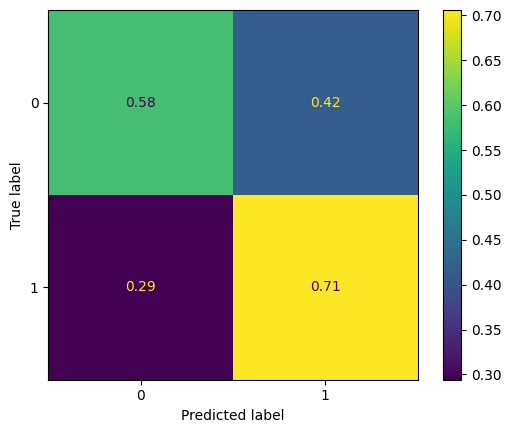

In [17]:
cf = confusion_matrix(y_test, y_pre, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()

# Boosting

In [18]:
# AdaBoost cho mô hình Decision Tree
DT_param_grid = {
    'n_estimators': [50, 100, 200], # Số lượng mô hình con
    'learning_rate': [0.01, 0.1, 1]
}

DT = DecisionTreeClassifier(max_depth=3)
DT_AdaBoost = GridSearchCV(AdaBoostClassifier(DT, random_state=0), param_grid=DT_param_grid)
DT_AdaBoost.fit(X_train, y_train).score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

0.9486775313919316

In [19]:
# Gradient Boosting
GB_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 3, 5, 7]
}

GB = GradientBoostingClassifier(max_depth=1,random_state=0)
# n_jobs=-1: Sử dụng tất cả các lõi CPU sẵn có để thực hiện việc tìm kiếm siêu tham số 1 cách song song
GB_grid_search = GridSearchCV(GB, param_grid=GB_param_grid, n_jobs=-1)
GB_grid_search.fit(X_train, y_train).score(X_val, y_val)

0.9760886989046219

In [20]:
y_pre = GB_grid_search.predict(X_test)
evaluate = classification_report(y_test, y_pre, output_dict=True)
evaluate_df = pd.DataFrame(evaluate).transpose()
evaluate_df

,precision,recall,f1-score,support
0,0.969124,0.976777,0.972935,2153.000000
1,0.979608,0.972864,0.976224,2469.000000
accuracy,0.974686,0.974686,0.974686,0.974686
macro avg,0.974366,0.974820,0.974580,4622.000000
weighted avg,0.974725,0.974686,0.974692,4622.000000


In [21]:
# 3. XGBoost 
import xgboost as xgb

# Sử dụng GPU để huấn luyện mô hình
# use_label_encoder=False: sử dụng mã hóa nhãn -> số
xgb_model = xgb.XGBClassifier(use_label_encoder=False, tree_method='gpu_hist', eval_metric='logloss', random_state=0)
xgb_grid_search = GridSearchCV(xgb_model, param_grid=GB_param_grid, n_jobs=-1)
xgb_grid_search.fit(
    X_train, y_train,
    early_stopping_rounds=10, # Nếu không cải thiện sau 10 vòng lặp thì dừng
    eval_set=[(X_val, y_val)], # Đánh giá hiệu suất
    verbose=True # Hiển thị quá trình
)
xgb_grid_search.score(X_val, y_val)

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [16:52:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[0]	validation_0-logloss:0.64376
[1]	validation_0-logloss:0.60526
[2]	validation_0-logloss:0.57259
[3]	validation_0-logloss:0.54233
[4]	validation_0-logloss:0.51535
[5]	validation_0-logloss:0.49549
[6]	validation_0-logloss:0.47571
[7]	validation_0-logloss:0.46070
[8]	validation_0-logloss:0.44391
[9]	validation_0-logloss:0.43094
[10]	validation_0-logloss:0.42015
[11]	validation_0-logloss:0.40460
[12]	validation_0-logloss:0.39104
[13]	validation_0-logloss:0.38219
[14]	validation_0-logloss:0.37252
[15]	validation_0-logloss:0.36248
[16]	validation_0-logloss:0.35345
[17]	validation_0-logloss:0.34527
[18]	validation_0-logloss:0.33622
[19]	validation_0-logloss:0.32659
[20]	validation_0-logloss:0.31710
[21]	validation_0-logloss:0.31212
[22]	validation_0-logloss:0.29934
[23]	validation_0-logloss:0.29032
[24]	validation_0-logloss:0.28369
[25]	validation_0-logloss:0.27350
[26]	validation_0-logloss:0.26798
[27]	validation_0-logloss:0.26358
[28]	validation_0-logloss:0.25725
[29]	validation_0-loglos

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [16:52:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [16:52:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the b

0.9725353994122362

# 